### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [168]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

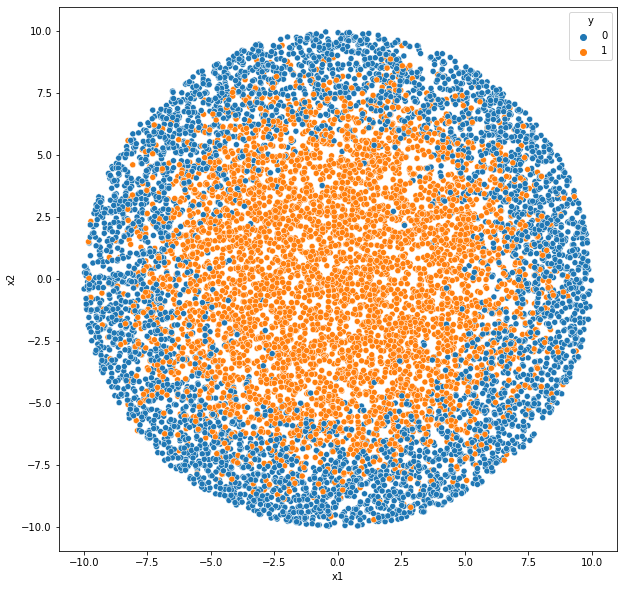

In [169]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [306]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5


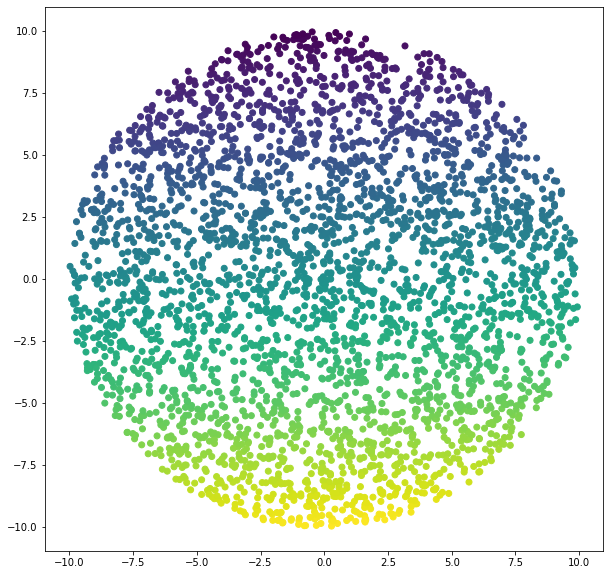

In [171]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

predict_logit =  model.predict(X_test)
predict_log_proba = model.predict_log_proba(X_test)

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(10, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba[:,1])
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8463636363636363


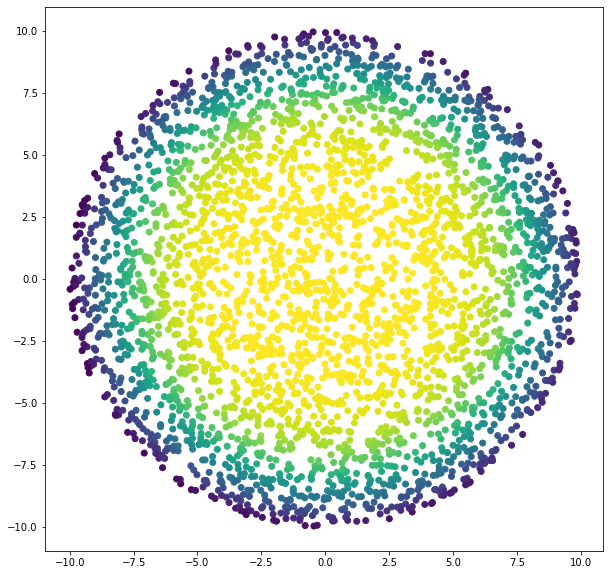

In [173]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели


df_new['new_feature_1'] = np.sqrt(df_new['x1']*df_new['x1'] + df_new['x2']*df_new['x2'])

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

model_new = LogisticRegression()
model_new.fit(X_train_new, y_train_new)

predict_logit = model_new.predict(X_test_new)
predict_log_proba = model_new.predict_log_proba(X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(10, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba[:,1])
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.8112121212121212


/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/sklearn/tree/_classes.py:1014: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


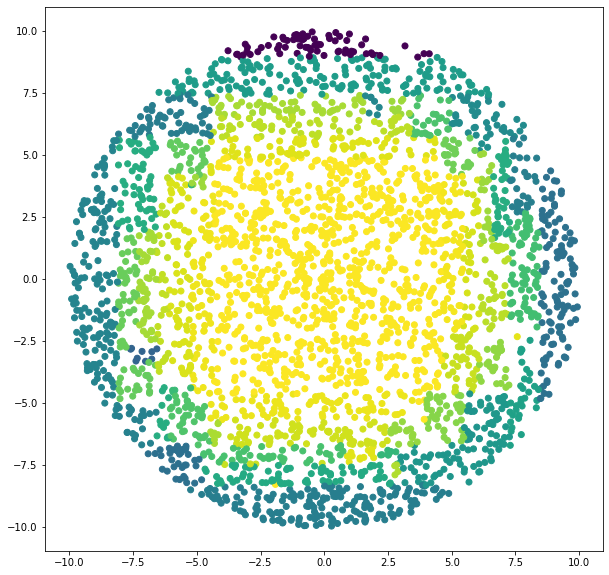

In [175]:
#особенность - переобучение. Зафиксируем макс. глубину дерева, 
# заодно с помощью gridsearch подберем оптимальный параметр макс. кол-ва узлов
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
dtc = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=70)

dtc.fit(X_train,y_train)
predict_tree = dtc.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dtc.predict_log_proba(X_test)

#########################################

plt.figure(figsize=(10,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba[:,1])
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.8112121212121212


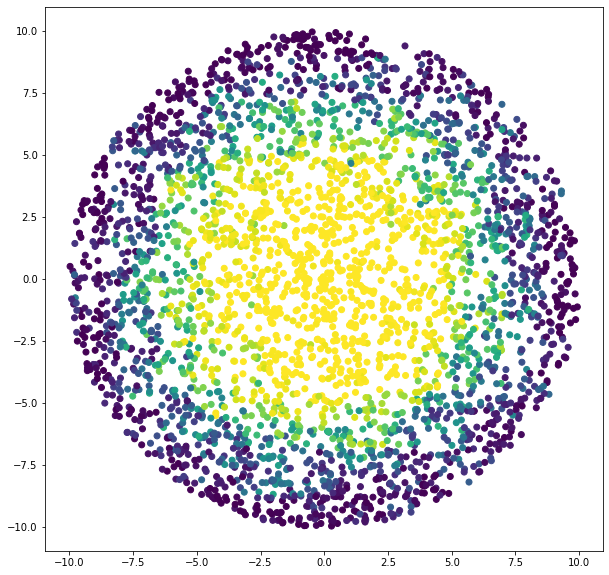

In [176]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

predict_forest = rfc.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = rfc.predict_proba(X_test)

#########################################

plt.figure(figsize=(10, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba[:,1])
plt.show()

In [269]:
X_test.shape

(3300, 2)

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [177]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы
from tensorflow.keras.metrics import Accuracy

2.9.1
2.9.0


In [307]:
def get_new_model( ):
    acc = Accuracy()

    ###########################################################
    # Ваш код! 
    model = Sequential(name = 'MyFirstModel')  # модели можно дать имя!
    
    # Добавляем в нашу модель первый слой из 5 нейронов
    model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))

    # Добавляем функцию активации на первый слой 
    model.add(L.Activation('sigmoid'))


    
    model.add(L.Dense(2, activation='softmax', kernel_initializer = 'random_normal'))
    ###########################################################
    
    # В качестве оптимизации будем использовать Adam
    # Это такой специальный градиентный спуск, обсудим его в следущий раз
    optimizer = opt.Adam(lr=1e-3)

    # Собираем модель
    model.compile(loss = 'categorical_crossentropy', 
                  metrics=['acc'], 
                  optimizer=optimizer)
    
    return model

In [308]:
model = get_new_model()

/usr/local/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [278]:
from tensorflow.keras.utils import to_categorical
to_categorical(y_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [309]:
hist = model.fit(X_train, to_categorical(y_train), validation_split=0.2, epochs=50, verbose=1, batch_size=128)

Epoch 1/50
42/42 [==============================] - 1s 8ms/step - loss: 0.6936 - acc: 0.4974 - val_loss: 0.6931 - val_acc: 0.5015
Epoch 2/50
42/42 [==============================] - 0s 3ms/step - loss: 0.6929 - acc: 0.5127 - val_loss: 0.6933 - val_acc: 0.5015
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.6930 - acc: 0.5127 - val_loss: 0.6932 - val_acc: 0.5015
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 0.6932 - acc: 0.5127 - val_loss: 0.6932 - val_acc: 0.5015
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.6928 - acc: 0.5127 - val_loss: 0.6935 - val_acc: 0.5015
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 0.6928 - acc: 0.5127 - val_loss: 0.6933 - val_acc: 0.5015
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 0.6927 - acc: 0.5127 - val_loss: 0.6934 - val_acc: 0.5015
Epoch 8/50
42/42 [==============================] - 0s 3ms/step - loss: 0.6927 - acc: 0.51

In [280]:
preds = tf.argmax(model.predict(X_train), axis=1)

210/210 [==============================] - 0s 1ms/step


In [281]:
preds

<tf.Tensor: shape=(6700,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 0])>

In [282]:
acc = Accuracy()

In [283]:
acc(preds,y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8077612>

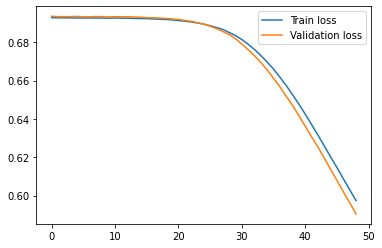

In [284]:
start = 1
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [285]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [286]:
model = get_new_model( )  # Эпох стало 300 вместо 100
hist = model.fit(X_train, to_categorical(y_train), validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50


/usr/local/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


168/168 [==============================] - 3s 16ms/step - loss: 0.6928 - acc: 0.5151 - val_loss: 0.6933 - val_acc: 0.5045
Epoch 2/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6928 - acc: 0.5151 - val_loss: 0.6934 - val_acc: 0.5045
Epoch 3/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6928 - acc: 0.5174 - val_loss: 0.6937 - val_acc: 0.5045
Epoch 4/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6928 - acc: 0.5155 - val_loss: 0.6940 - val_acc: 0.5045
Epoch 5/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6928 - acc: 0.5151 - val_loss: 0.6933 - val_acc: 0.5045
Epoch 6/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6927 - acc: 0.5175 - val_loss: 0.6936 - val_acc: 0.5045
Epoch 7/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6928 - acc: 0.5151 - val_loss: 0.6935 - val_acc: 0.5045
Epoch 8/50
168/168 [==============================] - 0s 2ms/step - loss: 0.6927 - acc

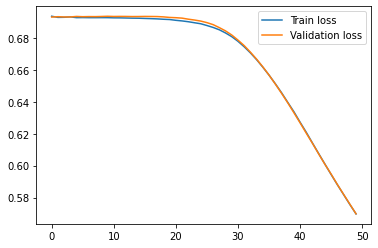

In [310]:
start = 0
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [311]:
score = model.evaluate(X_test, to_categorical(y_test), verbose=0)
score 

[0.5631006360054016, 0.8199999928474426]

104/104 [==============================] - 0s 1ms/step
Точность нашей модели 0.82


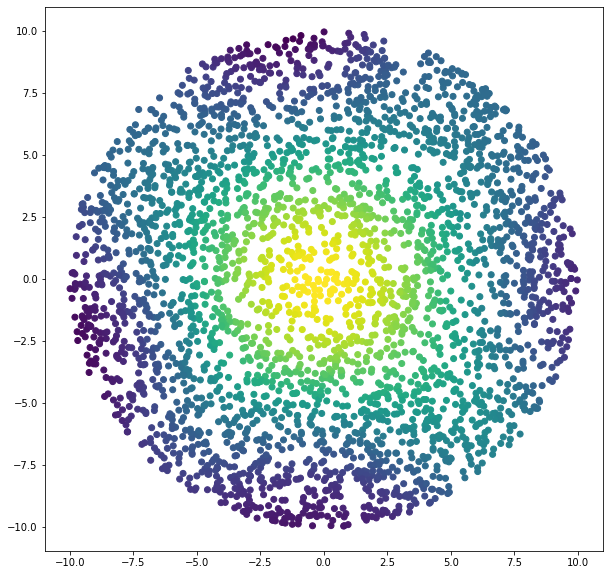

In [314]:
#########################################
# Ваш код
predict_neural = model.predict(X_test)

predict_classes = []
for i in predict_neural:
    if i[0]>i[1]:
        predict_classes.append(0)
    else:
        predict_classes.append(1)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(10, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural[:,1])
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)